# Trabajo Práctico 1 - Análisis Exploratorio


##### Grupo 36 - Integrantes: Nilda, José y Florencia
---

## 1. Introducción

   El mundo de la publicidad móvil tiene contacto directo con mucha información, esto es debido a que hoy en días las aplicaciones que instalamos y utilizamos en nuestros dispositivos forman parte de micromomentos diarios, donde estamos generando datos importantes que son son utilizadas en el marketing digital.
   Jampp es una empresa que en 2013 asumió el reto de explotar el mercado de la publicidad móvil, con la visión de ayudar a los anunciantes a crear clientes leales a la marca, considerando que la inversión a dicha publicidad no puede ser mayor a las ventas de las aplicaciones móviles (apps), en ese sentido consiguen espacios publicitarios en sitios de subastas y para impulsar las ventas de lo que ofrece cada apps hacen foco en el retargeting, estos desafíos son alcanzados con el uso de técnicas de aprendizaje automático y el enfoque que se necesita en cada industria.
   La materia Organización de Datos de la FIUBA logró una alianza con Jampp para que se haga este primer trabajo práctico, donde el objetivo es realizar un análisis exploratorio sobre cuatro datasets, a saber: Auctions, Clicks, Installs y Events. A continuación, un breve resumen de la información contenida en cada dataset correspondiente a un periodo acotado de tiempo, comprendido entre las fechas 2019-03-05 y 2019-03-13, en Uruguay:
    
* Auctions: generado por el RTB (real-time bidding), cada fila representa una subasta;
* Clicks: cada fila representa un click realizado por el usuario en la impresión de una publicidad;
* Installs: cada fila representa una instalación realizada por un usuario, ya sean atribuidas o no a las impresiones de publicidad de Jampp; 
* Events: muestra una observación de la tabla en relación a las acciones que hace cada usuario dentro de la aplicación ya instalada.

A partir de este análisis pretendemos descubrir patrones que puedan resultar interesantes para, en una segunda parte, lograr determinar para un instante dado, el tiempo hasta que un dispositivo 𝑑 aparezca de vuelta en una subasta RTB, y para un instante dado, el tiempo hasta que un dispositivo 𝑑 instale una aplicación.


## 2. Análisis Exploratorio

### 2.1 Dataset Clicks

Cada fila del dataset clicks representa un click realizado por el usuario en la impresión de una publicidad, contando Clicks con 26351 filas y 20 columnas.  Las columnas que no presentaron valores nulos
fueron “advertiser_id”, “source_id”, “created”, “country_code”, “latitude”, “longitude”, “wifi_connection”, “trans_id”, “specs_brand”, “ref_type” y “ref_hash” (Tabla 1 ). Mientras que la columna “action_id” sólo posee nulos. Los valores de las columnas “timeToClick”, “touchX” y “touchY” presentaron una cantidad de valores nulos similar, alrededor de 3300 sobre el total de la base de datos.

In [84]:
import pandas as pd

#ignoro las warnings
import warnings
warnings.filterwarnings('ignore')

# Leo el dataset Clicks
clicks = pd.read_csv('D:/Desktop/Materias/Organizacion_datos_2019/clicks.csv.gzip',
                     compression = 'gzip')

#Explicito el formato de la fecha
clicks['created'] = pd.to_datetime(clicks['created'], format='%Y-%m-%d %H')

#Cantidad de filas y columas
clicks.shape

(26351, 20)

In [129]:
# veo si hay valores nulos

import numpy as np

clicks_nulos = clicks.isnull().sum()

#genero un dataframe
clicks_nulos = pd.DataFrame({'columnas': clicks_nulos.index.values, "nulos": clicks_nulos})
clicks_nulos = clicks_nulos.reset_index(drop = True)

# guardo esta tabla como archivo delimitado por comas
clicks_nulos.to_csv("clicks_nulos.csv")

clicks_nulos


,columnas,nulos
0,advertiser_id,0
1,action_id,26351
2,source_id,0
3,created,0
4,country_code,0
5,latitude,0
6,longitude,0
7,wifi_connection,0
8,carrier_id,11
9,trans_id,0


In [38]:
#Visualizo las primeras filas
clicks.head()

,advertiser_id,action_id,source_id,created,country_code,latitude,longitude,wifi_connection,carrier_id,trans_id,os_minor,agent_device,os_major,specs_brand,brand,timeToClick,touchX,touchY,ref_type,ref_hash
0,2,NaN,4,2019-03-06 22:42:12.755,6333597102633388268,1.205689,1.070234,False,1.0,iGgClCM9exiHF4K31g94XmvHEBSLKIY,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,1.563,0.905,0.078,1891515180541284343,1904083516767779093
1,0,NaN,0,2019-03-08 10:24:30.641,6333597102633388268,1.218924,1.071209,False,4.0,MMHTOJ6qKAOeIH_Eywh1KIcCaxtO9oM,3.025219e+18,NaN,1.774085e+18,392184377613098015,NaN,NaN,NaN,NaN,1891515180541284343,3086509764961796666
2,0,NaN,0,2019-03-08 15:24:16.069,6333597102633388268,1.205689,1.070234,False,6.0,vIrEIdf9izUaWdAri6Ezk7T3nHFvNQU,5.975656e+18,NaN,3.072849e+18,392184377613098015,NaN,NaN,0.946,0.473,1891515180541284343,6958163894863846647
3,2,NaN,3,2019-03-06 03:08:51.543,6333597102633388268,1.205689,1.070234,False,45.0,YaKxxEAs2UmZhSpRfiCO9Zpa82B_AKM,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,19.013,0.035,0.431,1891515180541284343,4368617728156436525
4,2,NaN,3,2019-03-06 03:32:55.570,6333597102633388268,1.205689,1.070234,False,45.0,X5XTOcYQovkl6yadYdAD7xioVGU9jiY,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,28.110,0.054,0.423,1891515180541284343,4368617728156436525


In [31]:
# Estadística descriptiva como visualización previa
clicks.describe()

,advertiser_id,action_id,source_id,country_code,latitude,longitude,carrier_id,os_minor,agent_device,os_major,specs_brand,brand,timeToClick,touchX,touchY,ref_type,ref_hash,horas,dia
count,26351.000000,0.0,26351.000000,2.635100e+04,26351.000000,26351.000000,26340.000000,2.633900e+04,3.243000e+03,2.633900e+04,2.635100e+04,6235.000000,22977.000000,23011.000000,23011.000000,2.635100e+04,2.635100e+04,26351.000000,26351.000000
mean,2.991993,NaN,1.245266,6.333597e+18,1.206906,1.070233,7.743812,4.635375e+18,4.171028e+18,3.913451e+18,1.299055e+18,1.482277,230.403309,0.638784,1.478656,1.888100e+18,4.611581e+18,10.423437,10.274373
std,0.164070,NaN,2.188948,2.089000e+05,0.004484,0.001896,7.017027,1.642969e+18,2.460496e+18,1.885866e+18,1.149672e+18,1.583764,976.849149,0.301983,2.622727,1.721252e+17,2.673175e+18,7.771639,1.920036
min,0.000000,NaN,0.000000,6.333597e+18,1.205058,1.058204,0.000000,6.666626e+17,4.513618e+16,7.436481e+17,3.921844e+17,0.000000,0.017000,0.000000,0.000000,1.494519e+18,9.286192e+14,0.000000,5.000000
25%,3.000000,NaN,0.000000,6.333597e+18,1.205689,1.070234,3.000000,3.378640e+18,1.975183e+18,1.774085e+18,3.921844e+17,0.000000,2.915000,0.426000,0.183000,1.891515e+18,2.273798e+18,2.000000,9.000000
50%,3.000000,NaN,0.000000,6.333597e+18,1.205689,1.070234,6.000000,3.511538e+18,3.516812e+18,3.072849e+18,3.921844e+17,1.000000,10.588000,0.726000,0.645000,1.891515e+18,4.623721e+18,10.000000,11.000000
75%,3.000000,NaN,1.000000,6.333597e+18,1.205689,1.070234,13.000000,6.391567e+18,6.589622e+18,4.566454e+18,2.733036e+18,2.000000,71.703000,0.901000,0.991000,1.891515e+18,6.917850e+18,17.000000,12.000000
max,8.000000,NaN,10.000000,6.333597e+18,1.237861,1.085358,116.000000,9.081082e+18,9.221733e+18,7.499732e+18,8.930605e+18,13.000000,17616.188000,1.000000,16.600000,6.323872e+18,9.221118e+18,23.000000,13.000000


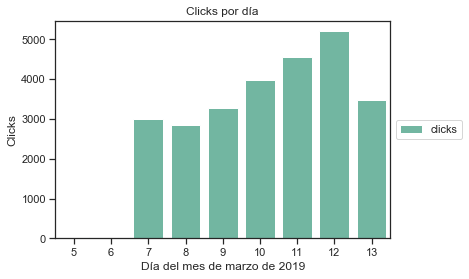

In [63]:
# grafico como barras

#estilo
sns.set(palette='Set2', style = "ticks")

# cuento los dias 
n_clicks = clicks.groupby("dia").agg({"dia":"count"})

#para click defini estas columnas antes
df_bar = pd.DataFrame({'clicks': n_clicks["dia"]})

#paso el dataset a "formato largo"
df_bar = pd.melt(df_bar.reset_index(), id_vars=["dia"])

#grafico de barras
fig = plt.figure()
sns.barplot(x='dia', y='value', hue='variable', data=df_bar)

# Titulo
plt.title('Clicks por día')

#ejes
plt.xlabel("Día del mes de marzo de 2019")
plt.ylabel("Clicks")

# saco leyenda de dentro del gráfico
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

fig.savefig("clicks_barras.png", dpi=fig.dpi, bbox_inches='tight')


El 99.66% de los clicks de esta base de datos estuvieron relacionados con publicidades del “advertiser 3”. La figura 1 permite observar que: (1) sólo hubo clicks todos los días del período estudiado para el advertiser 3 y el 0, (2) de ambos, el advertiser 3 presenta un aumento de tres órdenes de magnitud en la cantidad de clicks a partir del día 7 de marzo, lo cual no ocurre para el advertiser 0, (3) el día máximo de clicks ocurrió el día 12 para el advertiser 3, que obtuvo 5198 clicks y (4) los días 5 y 6 de marzo de 2019 presentaron considerablemente menos cantidad de clicks. Eliminar los valores correspondientes a los advertisers distintos al 3 no modifica el patrón general de datos que implica pocos valores los días 5 y 6 de marzo, y luego un importante aumento en la cantidad de clicks.


In [210]:
#Porcentaje datos pertenecientes a un advertiser particular
clicks['advertiser_id'].value_counts(normalize=True) * 100

3    99.666047
0     0.265645
2     0.045539
7     0.007590
1     0.007590
8     0.003795
5     0.003795
Name: advertiser_id, dtype: float64

In [71]:
# HEATMAP paso 1
# filtro el dataset par ver los valores correspondientes a todos los advertisers menos el 2

import datetime as dt

#genero una columna extrayendo las horas y otra con los días
clicks['horas'] = clicks['created'].dt.hour
clicks['dia'] = clicks['created'].dt.day

# agrupo
adv_group = clicks.groupby(["dia","advertiser_id"]).agg({"advertiser_id":"count"})

# Manejo las columnas para poder 
adv_group.columns = [''] * len(adv_group.columns)
adv_group = adv_group.reset_index()
adv_group.columns = ['dia', 'advertiser_id',"cantidad"] 

adv_group = adv_group.pivot(index='dia', columns='advertiser_id', values='cantidad')

adv_group

advertiser_id,0,1,2,3,5,7,8
dia,,,,,,,
5,21.0,NaN,7.0,3.0,NaN,NaN,NaN
6,3.0,1.0,4.0,5.0,NaN,NaN,1.0
7,7.0,NaN,NaN,2981.0,1.0,NaN,NaN
8,4.0,1.0,1.0,2832.0,NaN,1.0,NaN
9,3.0,NaN,NaN,3280.0,NaN,NaN,NaN
10,6.0,NaN,NaN,3960.0,NaN,NaN,NaN
11,10.0,NaN,NaN,4547.0,NaN,NaN,NaN
12,6.0,NaN,NaN,5198.0,NaN,NaN,NaN
13,10.0,NaN,NaN,3457.0,NaN,1.0,NaN


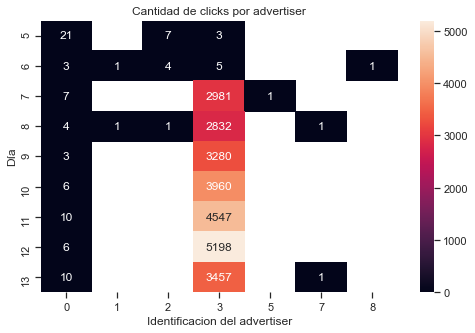

In [135]:
# FIGURA 1 - HEATMAP 

import seaborn as sns
import matplotlib.pyplot as plt

#inicio figura
fig = plt.figure()
sns.heatmap(adv_group, annot=True, fmt='g')

# Titulo
plt.title('Cantidad de clicks por advertiser')

# Nombre de los ejes
plt.xlabel('Identificacion del advertiser')
plt.ylabel('Día')

# cambio el tamaño del gráfico
fig.set_size_inches(8, 5, forward=True)

# guardar figura
fig.savefig("clicks_advertisers_heatmap.png", dpi=fig.dpi, bbox_inches='tight')

Los valores de “advertiser_id” no presentaban nulos en esta base de datos, por lo tanto en el análisis de la figura 1 estamos considerando la totalidad de los clicks. Resulta particularmente llamativo reconocer que la variable con valores nulos “tiempo hasta el click” (“timeToClick”) (Tabla 1), parecería tener una gran cantidad de faltantes el día 7 de marzo para el cual se habían observado 2981 reportes de clicks (Fig. 1), y apenas se observan algunos puntos con “tiempo hasta el click” reportado (Fig 2). Si bien se tratará más adelante ya se observa que la mayor cantidad de observaciones se encontró ligada a valores de “tiempo hasta el click” más bajos (Fig 2). Además se observaron cuatro franjas horarias en las cuales no se reportó el valor de tiempo hasta el click. Un patrón similar se observó de graficar “touchY” y “touchX” a lo largo del tiempo (datos no mostrados).



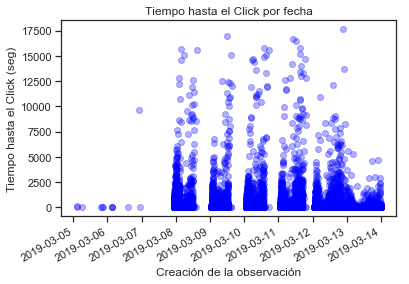

In [76]:
# FIGURA 2 - Tiempo hasta el click por fecha

import matplotlib.pyplot as plt

#estilo
sns.set(palette='Set1', style = "ticks")

# Inicio figura
fig = plt.figure()

# Grafico la cantidad de clicks a lo largo del tiempo
plt.plot_date(clicks['created'], clicks['timeToClick'], fmt="bo", xdate=True, alpha=0.3)

# Etiquetas giradas
plt.gcf().autofmt_xdate()

# Titulo
plt.title('Tiempo hasta el Click por fecha')

# Nombre de los ejes
plt.xlabel('Creación de la observación')
plt.ylabel('Tiempo hasta el Click (seg)')
plt.show()

# guardar gráfico
fig.savefig("clicks_tiempo.png", dpi=fig.dpi, bbox_inches='tight')

Para determinar cómo se distribuyen los clicks a lo largo de cada día, se procedió a evaluar la densidad de clicks por hora, incluyendo o no incluyendo el día 7 (Fig. 3 a y b). Los días 5 y 6 fueron removidos del análisis ya que consideramos no muestran ningún patrón específico. Se observa en la figura 3a que el día 7 presenta la totalidad de los 2981 clicks en un rango muy corto de horas, a diferencia de lo que ocurre el resto de los días elegidos en este análisis. Como generalidad para el resto de los días (Fig 2b)  se observa que la mayoría de los clicks ocurren durante la madrugada, existiendo un segundo pico alrededor de las 10 de la mañana para todos los días, si bien este no se da a la misma hora. Es importante recordar que al estar observando la densidad de los datos no estamos evaluando la cantidad de clicks por día sino simplemente su distribución. 


In [254]:
# Exploratorio - cantidad de eventos por dia
clicks['dia'].value_counts()

12    5204
11    4557
10    3966
13    3468
9     3283
7     2989
8     2839
5       31
6       14
Name: dia, dtype: int64

In [255]:
# Exploratorio - cantidad de eventos por horas
clicks['horas'].value_counts()

1     4209
23    2726
2     2327
11    1455
22    1386
12    1199
10    1143
4     1079
16     966
15     959
5      945
13     926
14     834
9      754
3      754
6      678
18     655
17     641
8      537
7      518
21     451
0      440
20     389
19     380
Name: horas, dtype: int64

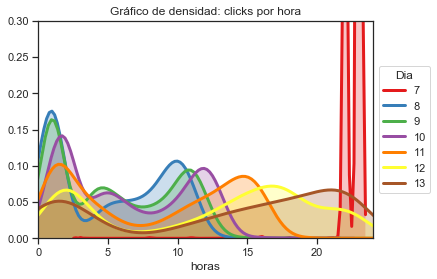

In [85]:
# FIGURA 3 - Grafico de densidad por día y hora

# Ambas figuras se realizaron modificando el paso de creacion de sub_clicks para que incluya o no el día 7

import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

#estilo
sns.set(palette="Set1", style = "ticks")

#genero una columna extrayendo las horas y otra con los días
clicks['horas'] = clicks['created'].dt.hour
clicks['dia'] = clicks['created'].dt.day
    
#remuevo los 3 primeros dias, contando a partir del dia 8
sub_clicks = clicks[clicks["dia"]>=7]

# grafico
fig, ax = plt.subplots(1,1)

# Ordeno los días antes del loop para que luego me queden en orden en la leyenda 
sub_dias = sorted(sub_clicks['dia'].unique())

# Itero filtrando por día y gráficando la densidad de clicks sobre el mismo eje
for s in sub_dias:
    data = sub_clicks[sub_clicks['dia'] == s]
    ax =  sns.distplot(data["horas"], hist = False, kde = True,
    kde_kws = {'shade': True, 'linewidth': 3}, label = s)

# modifico rangos de los ejes
ax.set(ylim=(0,0.3))
ax.set(xlim=(0,24))

# Saco leyenda de dentro del gráfico y agrego título
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5)).set_title('Dia')

# titulo
plt.title('Gráfico de densidad: clicks por hora')
fig.show()

# guardar gráfico
fig.savefig("clicks_horas_densidad.png", dpi=fig.dpi, bbox_inches='tight')

La distribución de datos el día 7 resulta particular (Fig. 3a) por lo que realizamos algunas caracterizaciones extras para intentar entender qué ocurría este día que lo diferenciaba del resto. Los valores de las coordenadas geográficas para los clicks del día 7 mostraron que 2586 clicks (86,7% del total) provinieron de un teléfono en la coordenada geográfica representada por los valores de latitud 1.20568 y longitud 1.07023 (Fig. 4). Para obtener más detalles sería de interés conocer a qué coordenadas reales (no estandarizadas) corresponden estos valores. 
Considerando que la mayoría de estos clicks se realizó desde las mismas coordenadas, lo que podría indicar que provienen de un único teléfono, y en un rango de horario muy limitado nos lleva a pensar la posibilidad de encontrarnos frente a un caso de fraude. Esto implica que un único dispositivo envía una cantidad de clicks muy alta en un tiempo muy corto, tal como observamos que ocurrió en el día 7. 


In [260]:
# Exploratorio - visualizo la cantidad de clicks por coordenada para el 7 de marzo

coor_7

,latitude,longitude,count
0,1.205058,1.077332,33
1,1.205356,1.070100,1
2,1.205393,1.070448,3
3,1.205393,1.077238,31
4,1.205689,1.070234,2586
5,1.205771,1.071220,1
6,1.205864,1.069878,2
7,1.205864,1.069973,10
8,1.205960,1.071483,1
9,1.206136,1.071841,2


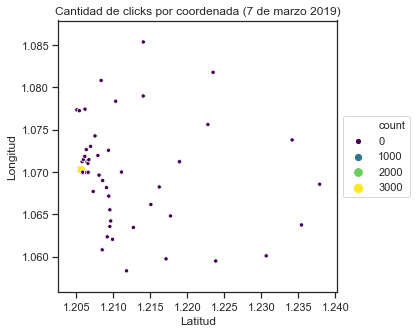

In [259]:
# FIGURA 4 - Cantidad de clicks para el día 7 de marzo de 2019

import seaborn as sns

# selecciono la parte de la base de datos que se corresponde al día 7
value = clicks[clicks["dia"] == 7]

# cantidad de clicks por coordenada
coor_7 = value.groupby(['latitude','longitude']).size().reset_index().rename(columns={0:'count'}) 

#inicio figura
fig = plt.figure()

sns.scatterplot("latitude", "longitude", data=coor_7, size = "count", hue = "count", palette = "viridis")

# Titulo
plt.title('Cantidad de clicks por coordenada (7 de marzo 2019)')

#ejes
plt.xlabel("Latitud")
plt.ylabel("Longitud")

# saco leyenda de dentro del gráfico
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# cambio el tamaño del gráfico
fig.set_size_inches(5, 5, forward=True)
fig.savefig("mapa_coord_dia7.png", dpi=fig.dpi, bbox_inches='tight')



Si consideramos la densidad de clicks en relación a las dos dimensiones de la pantalla del teléfono observamos que la gran mayoría de los mismos se encuentra centrada en un punto correspondiente a los mayores valores del eje X y menores valores del eje Y, en escala adimensional y dentro de una franja de mayor densidad (Fig. 5 a). Como no contábamos con información de dónde se encontraba la publicidad situada en la pantalla, se generó otro dónde se amplió el área de mayor densidad de puntos comprendida entre los valores de 0 y 1 del eje Y (Fig 5b). Si bien no son notorios por su baja cantidad en la Fig. 5a, hubo clicks dispersos por fuera de este área de mayor densidad.
 En particular el punto de color de mayor intensidad que se observa en la figura 5a y b podrían indicar que en esta zona se encuentra el botón de cierre de la publicidad. Realizar un análisis de los clicks que efectivamente producen ingresar a la publicidad implicaría eliminar de la base de datos los que ocurran en las coordenadas del botón de cierre de la aplicación. Sería de utilidad tener acceso a las impresiones que reciben los usuarios para realizar mayores análisis en esta dirección. 



<Figure size 432x288 with 0 Axes>

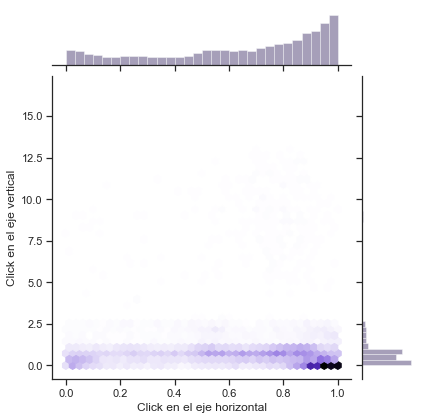

In [182]:
# FIGURA 5 - Jointplot - Densidad en 2D

# CONSIDERO LA PANTALLA DE 0 a 15 en Y

import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

#estilo
sns.set(palette="magma", style = "ticks")

# Inicio figura
fig = plt.gcf()

fig = sns.jointplot(x = "touchX", y = "touchY", data = clicks,
              kind="hex").set_axis_labels('Click en el eje horizontal', 
                                       'Click en el eje vertical')

# guardo el gráfico
fig.savefig("clicks_touchXY_density2D.png", bbox_inches='tight')
plt.show()

<Figure size 432x288 with 0 Axes>

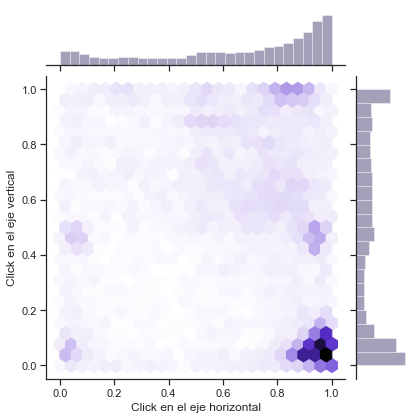

In [10]:
# FUGURA 5b -  Jointplot - Densidad en 2D

# CONSIDERO LA PANTALLA de 0 a 1 en Y

import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# estilo
sns.set(palette="magma", style = "ticks")

# subset

click_t = clicks[clicks["touchY"]<1]


# Inicio figura
fig = plt.gcf()

fig = sns.jointplot(x = "touchX", y = "touchY", data = click_t,
              kind="hex").set_axis_labels('Click en el eje horizontal', 
                                       'Click en el eje vertical')

# guardo el gráfico
fig.savefig("clicks_touchXY_density2D_y1.png", bbox_inches='tight')
plt.show()


El 75% de los datos de clicks presentaron un valor de tiempo hasta el click menor a 71 segundos (Tabla 2), siendo el mayor valor registrado 17616 segundos. La figura 6 muestra el histograma para “Tiempo hasta el click” donde se puede observar que la distribución de los valores son marcadamente asimétricos, indicando que los clicks tienden a realizarse a los pocos segundos de mostrarse la impresión en la pantalla. Para obtener una visualización representativa se eligió como límite máximo en el eje x el cuartil que representa el 90% de los datos, dejando fuera del histograma solo los valores más extremos.


In [134]:
#Analizo describe

timeto_desc = clicks.describe()[["timeToClick"]]

# guardo esta tabla como archivo delimitado por comas
timeto_desc.to_csv("clicks_timeto_desc.csv")

timeto_desc

,timeToClick
count,22977.000000
mean,230.403309
std,976.849149
min,0.017000
25%,2.915000
50%,10.588000
75%,71.703000
max,17616.188000


In [246]:
clicks["timeToClick"].quantile(0.9)

428.91960000000086

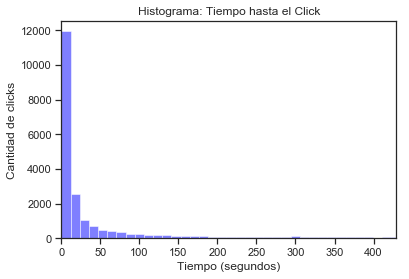

In [86]:
# FIGURA 6 - Histograma de TimeToClicks

import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
 
fig = plt.figure()

num_bins = 1500 #división del histograma
n, bins, patches = plt.hist(clicks["timeToClick"], num_bins, facecolor='blue', alpha=0.5)
plt.title('Histograma: Tiempo hasta el Click')

# elijo el limite del eje X como el valor correspondiente al percentil 90
plt.xlim(0,clicks["timeToClick"].quantile(0.9))

# Titulo ejes
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Cantidad de clicks')
plt.show()

#guarso figura
fig.savefig("clicks_timeToClicks_hist.png", dpi=fig.dpi, bbox_inches='tight')

Si analizamos los clicks con menores (Fig 7a) y mayores (Fig. 7b) tiempos hasta el click, observamos que aquellos que se dieron en menor tiempo presentaron menor dispersión en la pantalla que aquellos que tardaron mayores cantidades de tiempo.  


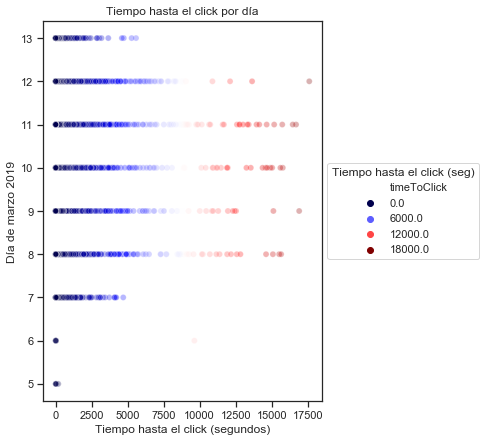

In [83]:
# Gráfico de puntos

import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# estilo
sns.set_style("ticks")

# Inicio figura
fig = plt.figure()
sns.scatterplot(x = "timeToClick",
                y = "dia", 
                hue = "timeToClick",
                alpha = 0.3,
                palette="seismic",
                data = clicks)

# titulo
plt.title('Tiempo hasta el click por día')

# titulos del eje
plt.xlabel('Tiempo hasta el click (segundos)')
plt.ylabel('Día de marzo 2019')

# saco leyenda de dentro del gráfico
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)).set_title("Tiempo hasta el click (seg)")

# cambio el tamaño del gráfico
fig.set_size_inches(5, 7, forward=True)

# guardo el gráfico
fig.savefig("clicks_touchXY_timetoclick.png", dpi=fig.dpi, bbox_inches='tight')


### 2.2 Dataset Installs

El dataset Installs cuenta con 3412 filas y 18 columnas. En particular, las columnas que no presentaron valores nulos fueron “created”, “application_id”, “attributed”, “implicit”, “device_countrycode” e “ip_adress”. La columna “click_hash” no presentó ningún valor reportado.


In [12]:
#Leo el archivo INSTALLS
import pandas as pd
from datetime import datetime

installs = pd.read_csv("D:/Desktop/Materias/Organizacion_datos_2019/installs.csv.gzip",
                       compression = 'gzip', dtype='object')

#Explicito el formato de la fecha
installs['created'] = installs['created'].astype('datetime64[ns]')

#Cantidad de filas y columnas
installs.shape

(3412, 18)

In [40]:
installs.head()

,created,application_id,ref_type,ref_hash,click_hash,attributed,implicit,device_countrycode,device_brand,device_model,session_user_agent,user_agent,event_uuid,kind,wifi,trans_id,ip_address,device_language,horas,dia
0,2019-03-13 01:43:33.445,0,1891515180541284343,8464844987297247076,NaN,False,False,6333597102633388268,3.083058605577787e+17,4.4452523127597215e+18,NaN,NaN,NaN,NaN,NaN,NaN,5529284367937637301,NaN,1,13
1,2019-03-13 04:58:35.078,0,1891515180541284343,3250564871270161533,NaN,False,False,6333597102633388268,3.083058605577787e+17,4.4452523127597215e+18,NaN,NaN,NaN,NaN,NaN,NaN,6098022721363533304,NaN,4,13
2,2019-03-13 04:20:57.666,0,1891515180541284343,7953318831018100268,NaN,False,True,6333597102633388268,5.1379920467642125e+17,6.026543327929208e+18,HasOffers Mobile AppTracking v1.0,NaN,0bfa9b4c-e07a-4522-b32d-138e3165ac98,Open,NaN,NaN,4636407223847323867,3.3013777759776993e+18,4,13
3,2019-03-13 04:20:57.698,0,1891515180541284343,7953318831018100268,NaN,False,False,6333597102633388268,5.1379920467642125e+17,6.026543327929208e+18,NaN,NaN,NaN,NaN,NaN,NaN,4636407223847323867,NaN,4,13
4,2019-03-10 22:24:56.684,0,1891515180541284343,8355110941557237501,NaN,False,True,6333597102633388268,1.083368711068078e+18,7.876611839898798e+18,HasOffers Mobile AppTracking v1.0,NaN,8f235a8c-41bf-4399-b33d-c41577c949b0,Open,NaN,NaN,685400811232710215,3.3013777759776993e+18,22,10


In [5]:
# Descripción
installs.describe()

,created,application_id,ref_type,ref_hash,click_hash,attributed,implicit,device_countrycode,device_brand,device_model,session_user_agent,user_agent,event_uuid,kind,wifi,trans_id,ip_address,device_language
count,3412,3412,3412,3412,0.0,3412,3412,3412,1047,3411,3364,1729,865,865,1729,6,3412,3378
unique,3412,31,2,3008,0.0,1,2,2,27,415,12,334,865,20,2,4,2717,30
top,2019-03-09 04:34:41.291000,7,1891515180541284343,3272750442824629569,NaN,False,False,6333597102633388268,3.083058605577787e+17,2.33194661091417e+18,http-kit/2.0,MercadoPago/2.58.0.2 CFNetwork/976 Darwin/18.2.0,48332bf7-41fe-498f-8514-7bf8e80c8aa1,af_app_opened,true,{hash},1992632945768888579,3.3013777759776993e+18
freq,1,947,2080,4,NaN,3412,2547,1820,472,759,1729,393,1,428,1377,3,33,1484
first,2019-03-05 00:00:38.219000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2019-03-13 23:54:00.526000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# veo si hay valores nulos
installs.isnull().sum()

created                  0
application_id           0
ref_type                 0
ref_hash                 0
click_hash            3412
attributed               0
implicit                 0
device_countrycode       0
device_brand          2365
device_model             1
session_user_agent      48
user_agent            1683
event_uuid            2547
kind                  2547
wifi                  1683
trans_id              3406
ip_address               0
device_language         34
dtype: int64

De las instalaciones en este período estudiado ninguna fue atribuida a Jampp, mientras que un 25% fue considerada una instalación implícita. El 75% fue de las observaciones de este dataset no corresponden ni a una instalación atribuida a Jampp ni implícita.


In [29]:
#Porcentaje de instalaciones atribuidas a Jammp

installs['attributed'].value_counts(normalize=True) * 100

# Ninguna instalacion fue atribuida a Jammp

False    100.0
Name: attributed, dtype: float64

In [30]:
#Porcentaje de instalaciones implicitas que fueron falsos
installs['implicit'].value_counts(normalize=True) * 100

# El 25% de las instalaciones fue implícita. El 75% restante no fue ni atribuida ni implícita.

False    74.6483
True     25.3517
Name: implicit, dtype: float64

En la figura 7 se comparó la densidad de  observaciones en el tiempo para el dataset clicks con las instalaciones. Se observa que el dataset de instalaciones presenta registros previos al comienzo de la mayor cantidad de clicks, que como ya observamos en la figura 1, recién ocurrió el 7 de marzo. Se puede observar un leve aumento de la cantidad de instalaciones el día 12 que se corresponde con el de mayor cantidad de clicks el mismo día (Fig 7). El desfase de las instalaciones con los valores de clicks los primeros días resultan interesantes de observar, más aún sabiendo que los valores de clicks del 7 pueden ser fraudulentos, y no por clicks que vayan a producir instalaciones reales. Tal vez el aumento de instalaciones del día 12 sea el único que se corresponde con un aumento real sobre clicks que llevarían a la instalación de la publicidad.

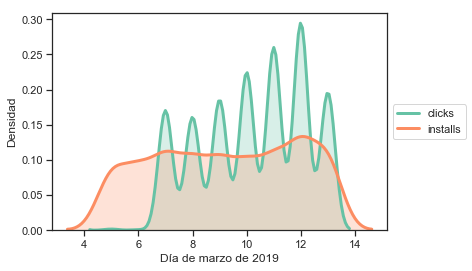

In [56]:
# Clicks versus Installs
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import datetime as dt

#estilo
sns.set(palette='Set2', style = "ticks")

#genero una columna extrayendo las horas y otra con los días
installs['horas'] = installs['created'].dt.hour
installs['dia'] = installs['created'].dt.day

#genero una columna extrayendo las horas y otra con los días
clicks['horas'] = clicks['created'].dt.hour
clicks['dia'] = clicks['created'].dt.day

#para click defini estas columnas antes
df = pd.DataFrame({'clicks': clicks["dia"], 'installs' : installs["dia"]})

#Grafico
fig, ax = plt.subplots(1, 1)

for columna in df.columns:
    ax =  sns.distplot(df[columna],
                       hist = False,
                       kde = True,
                       kde_kws = {'shade': True, 'linewidth': 3}, 
                       label = columna)
#ejes
plt.xlabel("Día de marzo de 2019")
plt.ylabel("Densidad")

# saco leyenda de dentro del gráfico
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

fig.savefig("clicks_installs_densidad.png", dpi=fig.dpi, bbox_inches='tight')



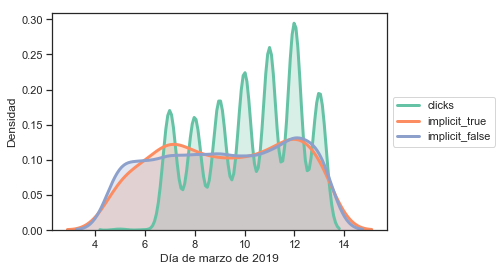

In [60]:
# FIGURA NO MOSTRADA EN EL INFORME DE Clicks versus Installs
# COnsiderando la diferencia entre instalaciones implicitas y no implicitas

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import datetime as dt

#estilo
sns.set(palette='Set2', style = "ticks")

#genero una columna extrayendo las horas y otra con los días
installs['horas'] = installs['created'].dt.hour
installs['dia'] = installs['created'].dt.day

#genero una columna extrayendo las horas y otra con los días
clicks['horas'] = clicks['created'].dt.hour
clicks['dia'] = clicks['created'].dt.day


impli_true = installs[installs["implicit"] == "True"]
impli_false = installs[installs["implicit"] == "False"]

#para click defini estas columnas antes
df = pd.DataFrame({'clicks': clicks["dia"], 'implicit_true' : impli_true["dia"], "implicit_false" : impli_false["dia"]})

#Grafico
fig, ax = plt.subplots(1, 1)

for columna in df.columns:
    ax =  sns.distplot(df[columna],
                       hist = False,
                       kde = True,
                       kde_kws = {'shade': True, 'linewidth': 3}, 
                       label = columna)
#ejes
plt.xlabel("Día de marzo de 2019")
plt.ylabel("Densidad")

# saco leyenda de dentro del gráfico
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

fig.savefig("clicks_installs_densidad_imp.png", dpi=fig.dpi, bbox_inches='tight')


La cantidad de instalaciones es considerablemente menor a la cantidad de clicks (Fig 8), lo cual no se observa en el gráfico de densidad (Fig. 7).  


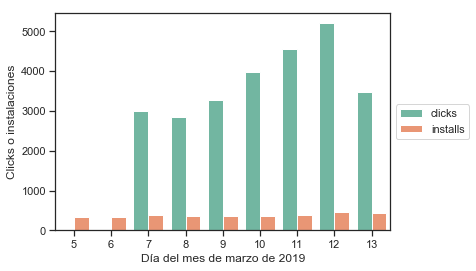

In [196]:
# FIGURA 8 - grafico como barras

#estilo
sns.set(palette='Set2', style = "ticks")

# cuento los dias 
n_clicks = clicks.groupby("dia").agg({"dia":"count"})
n_installs = installs.groupby("dia").agg({"dia":"count"})

#para click defini estas columnas antes
df_bar = pd.DataFrame({'clicks': n_clicks["dia"], 'installs' : n_installs["dia"]})

#paso el dataset a "formato largo"
df_bar = pd.melt(df_bar.reset_index(), id_vars=["dia"])

#grafico de barras
fig = plt.figure()
sns.barplot(x='dia', y='value', hue='variable', data=df_bar)

#ejes
plt.xlabel("Día del mes de marzo de 2019")
plt.ylabel("Clicks o instalaciones")

# saco leyenda de dentro del gráfico
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

fig.savefig("clicks_installs_barras.png", dpi=fig.dpi, bbox_inches='tight')


### 2.3 Events




In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm


events = pd.read_csv('data\events.csv.gzip',
                     compression = 'gzip',
                     low_memory=False,
                     dtype = 'object'


El dataset Events cuenta con 2494423 filas y 22 columnas. Las columnas que no presentaron valores nulos fueron “date”, “event_id”, “ref_type”, “ref_hash”, “application_id”, “attributed”, “device_countrycode” y “ip_address”.

Estos eventos están asociados al comportamiento de los usuarios con la aplicación instalada, donde algunos pueden ser atribuidos a Jampp.

Al parecer por temas 

Evaluación de la cantidad de valores nulos:

In [15]:
#cantidad de registros
events.shape

(2494423, 22)

In [90]:
# TABLA 3 - evaluando valores nulos

events_nulos = events.isnull().sum()
events_nulos = pd.DataFrame({'columnas': events_nulos.index.values, "nulos": events_nulos}).reset_index(drop = True)
events_nulos

,columnas,nulos
0,date,0
1,event_id,0
2,ref_type,0
3,ref_hash,0
4,application_id,0
5,attributed,0
6,device_countrycode,0
7,device_os_version,1472357
8,device_brand,1329460
9,device_model,87967


En la Tabla3, se pueden ver los eventos que son atribuidos a Jampp, estos se pueden observar en la columna “attributed” pero hay muy pocos.



In [3]:
#cantidad de elementos por columna

events.count()

date                  2494423
event_id              2494423
ref_type              2494423
ref_hash              2494423
application_id        2494423
attributed            2494423
device_countrycode    2494423
device_os_version     1022066
device_brand          1164963
device_model          2406456
device_city            614698
session_user_agent    2482637
trans_id                   82
user_agent            1391527
event_uuid            2489324
carrier                616434
kind                  2489324
device_os              657667
wifi                  1378872
connection_type        612463
ip_address            2494423
device_language       2406604
dtype: int64

In [22]:
events.describe()

,date,event_id,ref_type,ref_hash,application_id,attributed,device_countrycode,device_os_version,device_brand,device_model,...,trans_id,user_agent,event_uuid,carrier,kind,device_os,wifi,connection_type,ip_address,device_language
count,2494423,2494423,2494423,2494423,2494423,2494423,2494423,1022066,1164963,2406456,...,82,1391527,2489324,616434,2489324,657667,1378872,612463,2494423,2406604
unique,2488829,568,2,196049,269,2,1,81,250,2624,...,13,5111,2489324,84,583,4,2,3,285212,186
top,2019-03-12 13:59:31.416,22,1891515180541284343,7823950631004872496,66,False,6333597102633388268,4.3537503246500966e+18,3.083058605577787e+17,2.33194661091417e+18,...,{hash},2.394269162455642e+18,1b04882b-f62b-4f91-afde-b521a2d8188b,2.2481569642543155e+17,5.500848327478996e+18,7.531669329342818e+18,true,Cable/DSL,1992632945768888579,6.977049253562486e+18
freq,3,618228,1882743,2913,325696,2489324,2494423,277691,579861,210697,...,33,42325,1,436983,618217,389811,930902,331948,22640,745898


En la Tabla 4, los registros asociados a TRUE sólo conforman el 0.2%.
La columna “application_id”, nos puede dar una idea las aplicaciones con mayor cantidad de eventos, lo que intentamos explorar son las atribuidas a Jampp, la siguiente tabla representan el 92,9% de las mismas.

In [ ]:
# TABLA 4 - evaluando la cantidad de eventos attributed

events2 = events[['attributed']].groupby(['attributed']).size().reset_index(name='cuenta')
events2

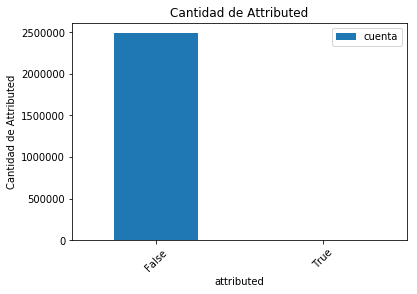

In [17]:
# FUGURA - gráfico

events2.plot(x = 'attributed', rot = 45, kind='bar')
plt.title('Cantidad de Attributed')
plt.xlabel('attributed')
plt.ylabel('Cantidad de Attributed')

En la tabla 5 se puede ver un top de “event_id” por “application_id”, por lo que estos serían los eventos que Jampp estaría impulsando con su retargeting.



In [85]:
# TABLA 5 - Explorando el 'event_id' más predominante para cada 'application_id' donde 'attributed' == True

#Top de eventos por 'application_id' donde 'attributed' == True
events_top = events[events['attributed'] == 'True'].groupby(['application_id']).size().reset_index(name='cuenta').sort_values(['cuenta'],ascending=False).reset_index()
events_top[0:7]

,index,application_id,cuenta
0,27,63,2323
1,6,16,1219
2,25,45,431
3,9,170,323
4,0,102,150
5,31,77,135
6,16,244,125


In [91]:
#filtrando las 'application_id' top de eventos

events_top2 = events[(events.application_id == '63') | (events.application_id == '16') | (events.application_id == '45') | (events.application_id == '170') | (events.application_id == '102') | (events.application_id == '77') | (events.application_id == '244')]
events_top3 = events_top2[['attributed', 'event_id','application_id']]

#agrupando y ordenando el top del tipo de evento por 'application_id'
events_top4 = events_top3[events_top3['attributed'] == 'True'].groupby(['application_id','event_id'], group_keys=False).size().reset_index(name='cuenta').sort_values(['application_id','cuenta'],ascending=False).reset_index()
events_top4

,index,application_id,event_id,cuenta
0,35,77,204,100
1,38,77,22,10
2,33,77,103,8
3,40,77,31,7
4,39,77,30,4
5,36,77,205,3
6,37,77,206,2
7,34,77,105,1
8,32,63,31,1253
9,26,63,156,470


In [18]:
# Explorando las el tipo de conexión y las IP
events.head()

,date,event_id,ref_type,ref_hash,application_id,attributed,device_countrycode,device_os_version,device_brand,device_model,...,trans_id,user_agent,event_uuid,carrier,kind,device_os,wifi,connection_type,ip_address,device_language
0,2019-03-05 00:09:36.966,0,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703034097298e+17,NaN,5.990116681709081e+18,...,NaN,NaN,a9c0b263-acb2-4577-92c5-cbde5d7a5db1,2.2481569642543155e+17,5.516623012570946e+18,7.531669329342818e+18,NaN,Cable/DSL,7858558567428669000,4.077062198952597e+17
1,2019-03-05 00:09:38.920,1,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703034097298e+17,NaN,5.990116681709081e+18,...,NaN,NaN,1cd98205-0d97-4ec2-a019-667997dbfe7a,2.2481569642543155e+17,9.977660181316936e+17,7.531669329342818e+18,NaN,Cable/DSL,7858558567428669000,4.077062198952597e+17
2,2019-03-05 00:09:26.195,0,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703034097298e+17,NaN,5.990116681709081e+18,...,NaN,NaN,f02e2924-21ae-492b-b625-9021ae0a4eca,2.2481569642543155e+17,5.516623012570946e+18,7.531669329342818e+18,NaN,Cable/DSL,7858558567428669000,4.077062198952597e+17
3,2019-03-05 00:09:31.107,2,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703034097298e+17,NaN,5.990116681709081e+18,...,NaN,NaN,a813cf45-a36e-4668-85e2-5395f1564e98,2.2481569642543155e+17,8.561152834701074e+18,7.531669329342818e+18,NaN,Cable/DSL,6324037615828123965,4.077062198952597e+17
4,2019-03-09 21:00:36.585,3,1891515180541284343,2635154697734164782,38,False,6333597102633388268,7.391843585977942e+18,NaN,5.960895846746644e+18,...,NaN,NaN,63a4f0aa-e147-469f-8c55-4ca4f8d0e310,2.2481569642543155e+17,8.731901657619553e+17,7.531669329342818e+18,NaN,Cable/DSL,2894495631302821483,3.3013777759776993e+18


In [5]:
#Creando nuevo DF para explorar las conexiones y las IP
conex = events[['date','connection_type', 'ip_address']]

#cambiando el type de las columnas
conex['date'] = pd.to_datetime(conex['date'], format='%Y-%m-%d %H:%M:%S.%f')
conex['connection_type'] = conex['connection_type'].astype('category')
conex['ip_address'] = conex['ip_address'].astype('category')

conex.dtypes

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import s

date               datetime64[ns]
connection_type          category
ip_address               category
dtype: object

In [38]:
#evaluando nulos
conex.count()

date               2494423
connection_type     612463
ip_address         2494423
dtype: int64

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0, 0.5, 'Cantidad de eventos')

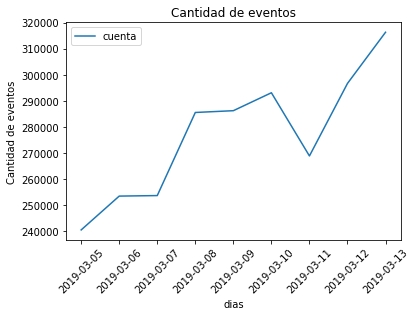

In [92]:
# Se van a evaluar las conexiones IP por día, para entender su comportamiento

#Se crea un dataset donde se convierte el datetime por date
conex['onlydate'] = conex['date'].dt.date

conex['onlydate'].value_counts().reset_index(name='cuenta').plot(x = 'index', rot = 45, kind='line') 

plt.title('Cantidad de eventos')
plt.xlabel('dias')
plt.ylabel('Cantidad de eventos')

In [100]:
#Contando la cantidad de eventos por cada IP

ipconx = conex['ip_address'].value_counts().reset_index(name='cuenta') 
ipconx.rename(columns={'index':'ip_address'}).head()

,ip_address,cuenta
0,1992632945768888579,22640
1,3162368506662488065,19379
2,7726314782926052608,17704
3,2394721645995561079,9777
4,589886713227299026,7561


### 2.4 Dataset Auctions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm


auctions = pd.read_csv('C:/roberto/auctions.csv.gzip',
                       compression = 'gzip',
                       low_memory=False,
                       dtype= {'auctions_type_id' : 'object','country' : 'category',
                               'date' : 'object','decide_id' : 'category',
                               'platform' : 'category', 'ref_type_id': 'category',
                               'source_id': 'category'})



Cada observación o fila del dataset de Auctions presenta una subasta, seleccionada de la base de datos de Jampp entre la fecha 2019-03-05 y 2019-03-13 para Uruguay. Es por ello que la columna "country" solo presenta un único valor correspondiente al código de dicho país y no consideramos que brinde información relevante.

In [3]:
auctions.head()

,auction_type_id,country,date,device_id,platform,ref_type_id,source_id,date2
0,NaN,6333597102633388268,2019-03-11 14:18:33.290763,6059599345986491085,1,1,0,2019-03-11
1,NaN,6333597102633388268,2019-03-11 14:18:34.440157,1115994996230693426,1,1,0,2019-03-11
2,NaN,6333597102633388268,2019-03-11 14:18:35.862360,7463856250762200923,1,1,0,2019-03-11
3,NaN,6333597102633388268,2019-03-11 14:18:36.167163,7829815350267792040,1,1,0,2019-03-11
4,NaN,6333597102633388268,2019-03-11 14:18:37.728590,1448534231953777480,1,1,0,2019-03-11


In [39]:
auctions.count()

auction_type_id           0
country            19571319
date               19571319
device_id          19571319
platform           19571319
ref_type_id        19571319
source_id          19571319
date2              19571319
dtype: int64

Sólo “auction_type_id” tiene nulos en todos sus registros, el resto de las columnas están completas.


In [100]:
#Contando la cantidad de eventos por cada IP

ipconx = conex['ip_address'].value_counts().reset_index(name='cuenta') 
ipconx.rename(columns={'index':'ip_address'}).head()

,ip_address,cuenta
0,1992632945768888579,22640
1,3162368506662488065,19379
2,7726314782926052608,17704
3,2394721645995561079,9777
4,589886713227299026,7561


In [47]:
auctions.dtypes

auction_type_id           float64
country                  category
date               datetime64[ns]
device_id                   int64
platform                 category
ref_type_id              category
source_id                category
date2                      object
dtype: object

In [38]:
auctions['country'].value_counts()

6333597102633388268    19571319
Name: country, dtype: int64

In [2]:
#conviertiendo la fecha de object a datatime
auctions['date'] = pd.to_datetime(auctions['date'], format='%Y-%m-%d %H:%M:%S.%f')

auctions['date2'] = auctions['date'].dt.date

In [32]:
#Se modela el dataframe para explorar por plarform por día
auctions2 = auctions[['date2','platform','date']]
auctions22 = auctions2.groupby(['date2','platform']).size().reset_index(name='cuenta')

aux1 = auctions22.loc[auctions22['platform'] == '1']
aux2 = auctions22.loc[auctions22['platform'] == '2']
aux3 = pd.merge(aux1, aux2, left_on='date2', right_on='date2', how='left')
aux3 = aux3[['date2','cuenta_x','cuenta_y']].rename(columns={'cuenta_x':'platform 1','cuenta_y':'platform 2'})
aux3

,date2,platform 1,platform 2
0,2019-03-05,719286,463115
1,2019-03-06,579624,453346
2,2019-03-07,1617609,430052
3,2019-03-08,1898054,404948
4,2019-03-09,1618742,455810
5,2019-03-10,2149876,487658
6,2019-03-11,2165005,409911
7,2019-03-12,2337162,442748
8,2019-03-13,2456467,481906


En la figura 8, se puede observar que en el proceso de subasta se observa un aumento en el movimiento de las subasta para la plataforma 1, se considera que se presentaron grandes oportunidades para que el sistem de Jampp inicie un proceso de auctions para conseguir alguna adjudicación.

Al no tener algo que nos indique que tipo de acción fue cada registro, nos imposibilita poder hacer un tracking del proceso de subasta, de igual forma no se puede determinar de cuántas subastas realizadas se logró alguna adjudicación.


Text(0, 0.5, 'Cantidad de Auctions')

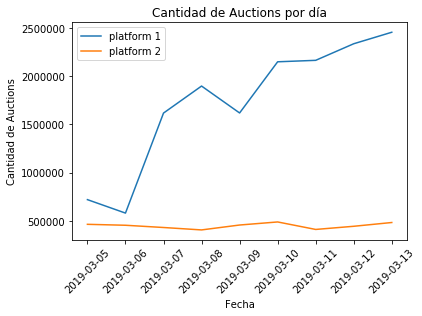

In [33]:
# FIGURA 8

aux3.plot(x = 'date2', rot = 45)
plt.title('Cantidad de Auctions por día')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Auctions')

In [56]:
auctions3 = auctions[['device_id','date']]
auctions33 = auctions3.groupby(['device_id']).size().reset_index(name='cuenta')
auctions33.sort_values(['cuenta'],ascending=False).head()

,device_id,cuenta
14311,633139769114048761,27762
161415,7202276635029175071,23055
163584,7298861376107043945,18188
141455,6302840482782120473,16400
120904,5376802567578262905,16367


## 3. Conclusiones

Las plataformas digitales han crecido de forma exponencial, trayendo consigo una gigantesca cantidad de datos que ameritan ser analizados, por lo que se vuelve importante el manejo de nuevas tecnología que permitan manipular estos datasets. Este trabajo práctico permitió obtener información de valor lo cual es una necesidad fundamental, debido a que hoy en día las empresas toman decisiones basadas en los datos.

El análisis del dataset clicks permitió comprender la dinámica temporal de las variaciones de las interacciones de los usuarios con las impresiones de la publicidad y también el patrón espacial de los clicks sobre la pantalla del teléfono. Estudiando los clicks realizados se logró determinar un caso de fraude observado inicialmente el día 7 de marzo debido a la alta cantidad de clicks en una misma franja horaria y provenientes de una misma ubicación. Por otro lado, el estudio del dataset installs reveló que no hubo durante este período instalaciones atribuidas a Jampp. Tampoco se observó una complementariedad al momento de comparar las instalaciones con los clicks, excepto tal vez el 12 de marzo donde se observa un aumento tanto de los clicks como de las instalaciones, siendo esto esperable considerando la posibilidad de fraude y la baja tasa de instalaciones atribuidas. La cantidad de clicks puede estar relacionada con eventos de cierre de la aplicación, haciendo más pronunciada aún la diferencia con las instalaciones. Con respecto al dataset Events se pudo observar que existen diferentes tipos de eventos que son realizados por los usuarios cuando interactúan con una aplicación móvil, pero los casos de éxitos son muy bajos para ser atribuidos a Jampp, sabiendo cuáles serían esos eventos probablemente se puede idear una estrategia para retargeting por último con el dataset auctions se observa un comportamiento a una plataforma eso quiere decir que la plataforma de Jampp consiguió una oportunidad para subastar para hacerse de un espacio publicitario.

